In [ ]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,load_model,model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

#讀取資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#CNN的輸入為(長,寬,色彩) 1代表黑白 3代表彩色
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
#正規化圖像
x_train = x_train/255
x_test = x_test/255
#將label轉換為label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#建構網路
model = Sequential()
#CNN輸入為28*28*1
model.add(Conv2D(32, kernel_size = 3, input_shape = (28,28,1),padding="same", activation = 'relu'))
#池化層
model.add(MaxPooling2D(pool_size = 2))
#攤平
model.add(Flatten())
#全連接層
model.add(Dense(16, activation = 'relu'))
#輸出層
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 31s 64ms/step - loss: 0.3987 - accuracy: 0.8848 - val_loss: 0.1540 - val_accuracy: 0.9558
Epoch 2/10
469/469 [==============================] - 29s 61ms/step - loss: 0.1287 - accuracy: 0.9641 - val_loss: 0.0967 - val_accuracy: 0.9708
Epoch 3/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0877 - accuracy: 0.9751 - val_loss: 0.0766 - val_accuracy: 0.9779
Epoch 4/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0701 - accuracy: 0.9794 - val_loss: 0.0706 - val_accuracy: 0.9781
Epoch 5/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0610 - accuracy: 0.9821 - val_loss: 0.0593 - val_accuracy: 0.9803
Epoch 6/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0622 - val_accuracy: 0.9780
Epoch 7/10
469/469 [==============================] - 27s 57ms/step - l

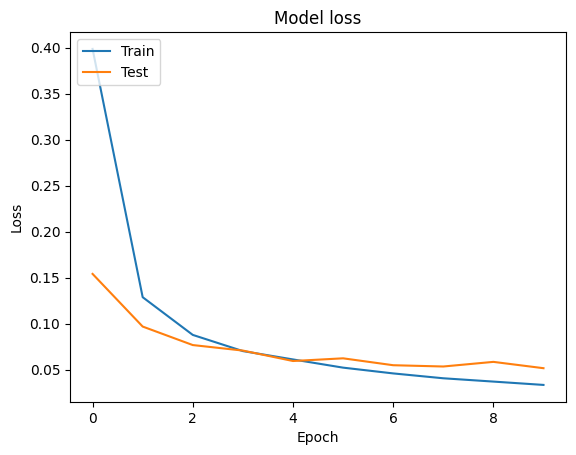

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#儲存model(包含網路)
model.save('model.h5')
#讀取整個model
model = load_model('model.h5')

In [ ]:
#只儲存權重
model.save_weights('model_weights.h5')
#需重新定義網路
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, input_shape = (28,28,1),padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
#讀取權重
model.load_weights('model_weights.h5')

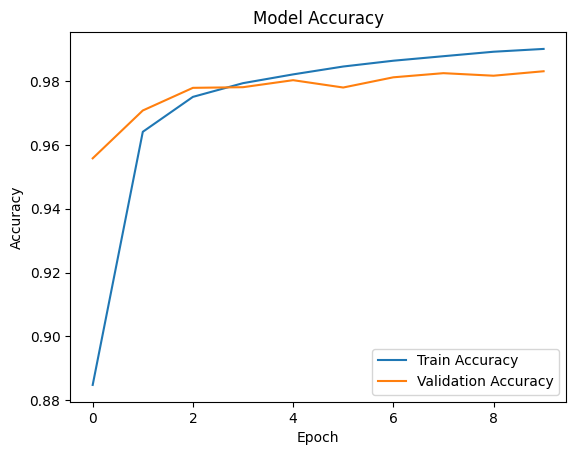

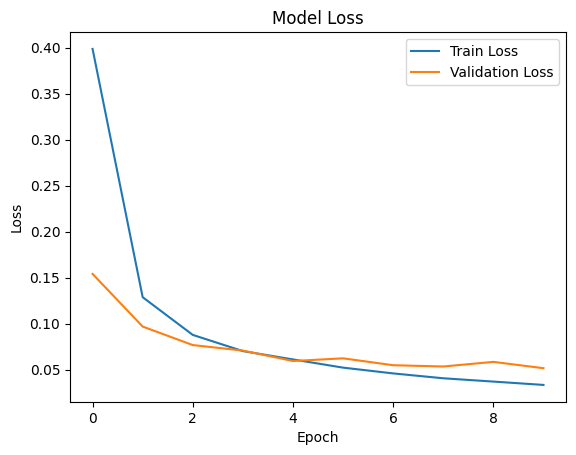

In [ ]:
# 绘制训练和验证准确率
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 绘制训练和验证损失
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()